In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [2]:
train_dir = 'Tomato/train'
valid_dir = 'Tomato/valid'

In [3]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size=23, image_size=(150, 150))
valid_data = tf.keras.utils.image_dataset_from_directory(valid_dir, batch_size=23, image_size=(150, 150))

Found 18345 files belonging to 10 classes.
Found 4585 files belonging to 10 classes.


In [4]:
class_names = train_data.class_names

In [5]:
len(class_names)

10

In [7]:
model = Sequential()
model.add(keras.layers.Rescaling(1./255))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
798/798 [==============================] - 179s 224ms/step - loss: 0.8310 - accuracy: 0.7094 - val_loss: 0.4279 - val_accuracy: 0.8595
Epoch 2/10
798/798 [==============================] - 189s 236ms/step - loss: 0.3416 - accuracy: 0.8837 - val_loss: 0.3824 - val_accuracy: 0.8674
Epoch 3/10
798/798 [==============================] - 172s 216ms/step - loss: 0.2090 - accuracy: 0.9288 - val_loss: 0.2456 - val_accuracy: 0.9158
Epoch 4/10
798/798 [==============================] - 170s 213ms/step - loss: 0.1341 - accuracy: 0.9535 - val_loss: 0.3118 - val_accuracy: 0.8964
Epoch 5/10
798/798 [==============================] - 177s 221ms/step - loss: 0.1061 - accuracy: 0.9644 - val_loss: 0.2647 - val_accuracy: 0.9143
Epoch 6/10
798/798 [==============================] - 171s 215ms/step - loss: 0.0875 - accuracy: 0.9702 - val_loss: 0.2758 - val_accuracy: 0.9138
Epoch 7/10
798/798 [==============================] - 180s 225ms/step - loss: 0.0703 - accuracy: 0.9761 - val_loss: 0.2979 -

In [8]:
metrics = pd.DataFrame(history.history)

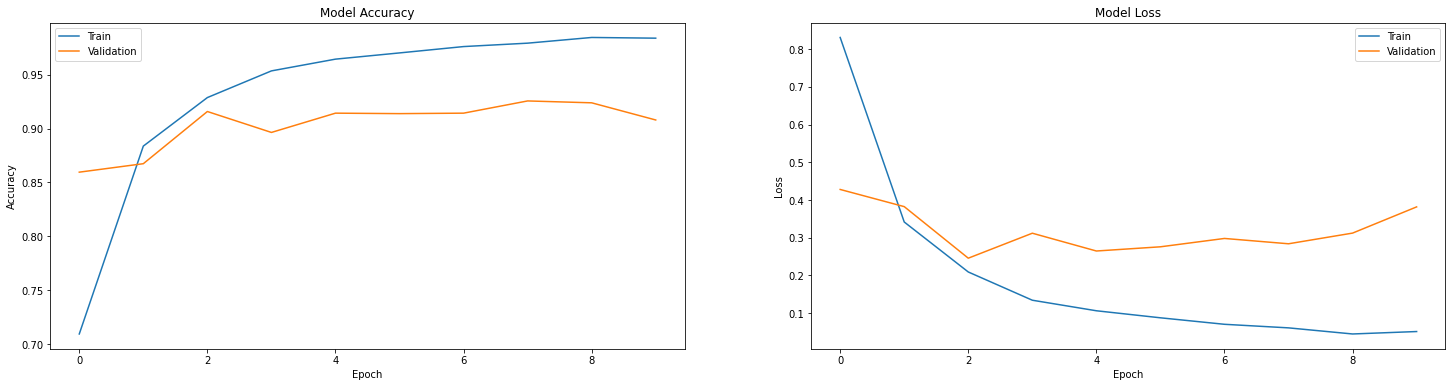

In [11]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(metrics['accuracy'])
plt.plot(metrics['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(metrics['loss'])
plt.plot(metrics['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [12]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(valid_data.classes, model.predict(valid_data).argmax(axis=1)))

AttributeError: 'BatchDataset' object has no attribute 'classes'

In [28]:
img1 = tf.keras.preprocessing.image.load_img('TomatoHealthy4.JPG', target_size=(150, 150))
img2 = tf.keras.preprocessing.image.load_img('TomatoYellowCurlVirus1.JPG', target_size=(150, 150))
img3 = tf.keras.preprocessing.image.load_img('TomatoYellowCurlVirus2.JPG', target_size=(150, 150))

In [29]:
img1_arr = tf.keras.preprocessing.image.img_to_array(img1)
img2_arr = tf.keras.preprocessing.image.img_to_array(img2)
img3_arr = tf.keras.preprocessing.image.img_to_array(img3)

In [30]:
img1_pred = model.predict(img1_arr.reshape(1, 150, 150, 3))
img2_pred = model.predict(img2_arr.reshape(1, 150, 150, 3))
img3_pred = model.predict(img3_arr.reshape(1, 150, 150, 3))

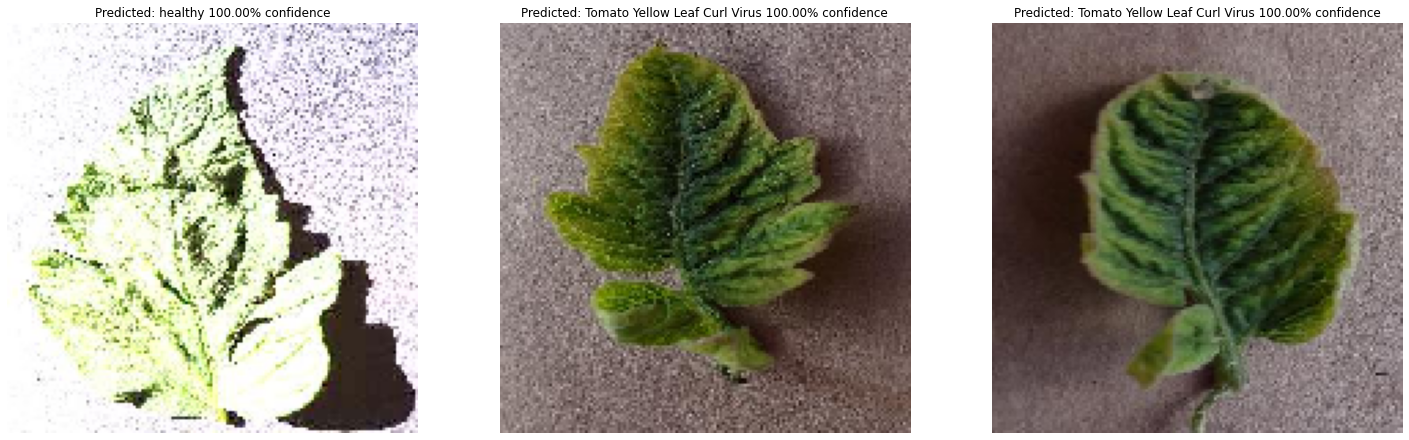

In [52]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.title(f"Predicted: {' '.join(class_names[img1_pred.argmax()].split('__')[1].split('_')[1:])} {(img1_pred[0][img1_pred.argmax()]*100):.2f}% confidence")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.title(f"Predicted: {' '.join(class_names[img2_pred.argmax()].split('__')[1].split('_')[1:])} {(img2_pred[0][img2_pred.argmax()]*100):.2f}% confidence")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img3)
plt.title(f"Predicted: {' '.join(class_names[img3_pred.argmax()].split('__')[1].split('_')[1:])} {(img3_pred[0][img3_pred.argmax()]*100):.2f}% confidence")
plt.axis('off')
plt.show()

In [44]:
' '.join(class_names[img3_pred.argmax()].split('__')[1].split('_')[2:])

'Yellow Leaf Curl Virus'

In [51]:
class_names[img1_pred.argmax()].split('__')[1].split('_')[1:]

['healthy']